# Clustering : Part 1

## Implementing the K-Means Clustering Algorithm

In [1]:
#Importing required modules
import numpy as np
from scipy.spatial.distance import cdist

#Function to implement steps given in previous section
def kmeans(x,k, no_of_iterations):
    print(x.shape)

    idx = np.random.choice(len(x), k, replace=False) # replace=False : no duplicates
    #Randomly choosing Centroids
    centroids = x[idx, :] #Step 1
    print(centroids.shape)

    #finding the distance between centroids and all the data points
    distances = cdist(centroids, x ,'euclidean') #Step 2 [k x #x]
    print(distances.shape)

    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances.T]) #Step 3 [#x,1]
    print(points.shape)

    #Repeating the above steps for a defined number of iterations
    #Step 4
    for _ in range(no_of_iterations):
        centroids = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0)
            centroids.append(temp_cent)

        centroids = np.vstack(centroids) #Updated Centroids  [k x n_features]

        distances = cdist(centroids, x ,'euclidean')
        points = np.array([np.argmin(i) for i in distances.T])

    return points

In [2]:
#Loading the required modules

import numpy as np
from scipy.spatial.distance import cdist
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
#Load Data
data = load_digits().data
pca = PCA(2)

#Transform the data
df = pca.fit_transform(data)

#Applying our function
label = kmeans(df,10,1000)

(1797, 2)
(10, 2)
(10, 1797)
(1797,)


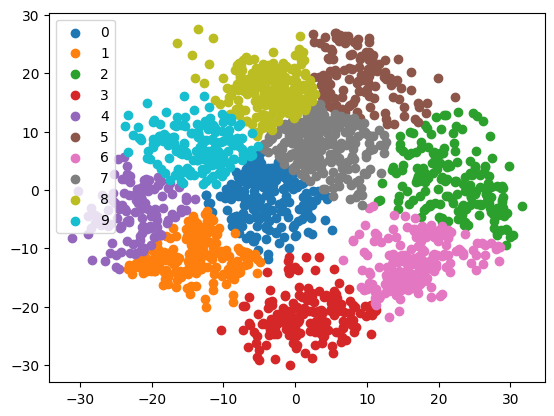

In [4]:
#Visualize the results

u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

# Clustering : Part 2

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
import numpy as np

### k-Means for Color Compression

One interesting application of clustering is in color compression within images. For example, imagine you have an image with millions of colors.
In most images, a large number of the colors will be unused, and many of the pixels in the image will have similar or even identical colors.


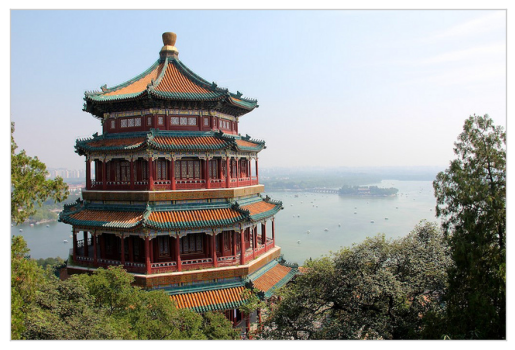

In [9]:
# Note: this requires the PIL package to be installed
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

In [11]:
china.shape # (height, width, RGB)

(427, 640, 3)

One way we can view this set of pixels is as a cloud of points in a three-dimensional color space.
We will reshape the data to `[n_samples, n_features]` and rescale the colors so that they lie between 0 and 1:

In [12]:
data = china / 255.0  # use 0...1 scale
data = data.reshape(-1, 3)
data.shape

(273280, 3)

We can visualize these pixels in this color space, using a subset of 10,000 pixels for efficiency (see the following figure):

In [13]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.default_rng(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

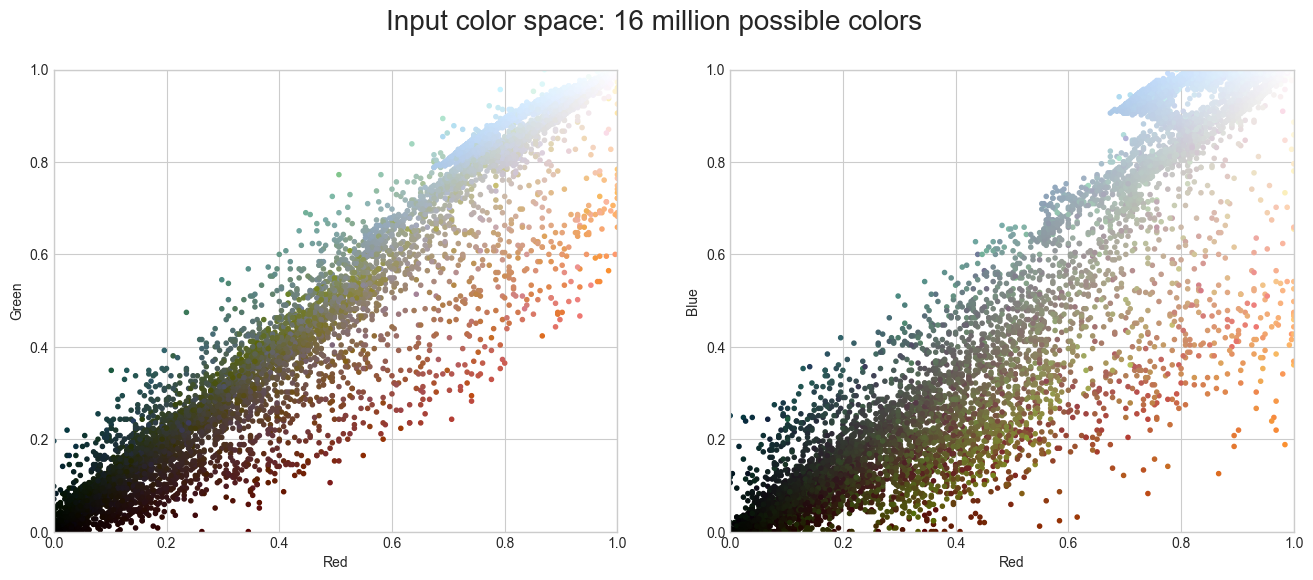

In [14]:
plot_pixels(data, title='Input color space: 16 million possible colors')

Now let's reduce these 16 million colors to just 16 colors, using a k-means clustering across the pixel space. Because we are dealing with a very large dataset, we will use the mini-batch k-means, which operates on subsets of the data to compute the result (shown in the following figure) much more quickly than the standard k-means algorithm:

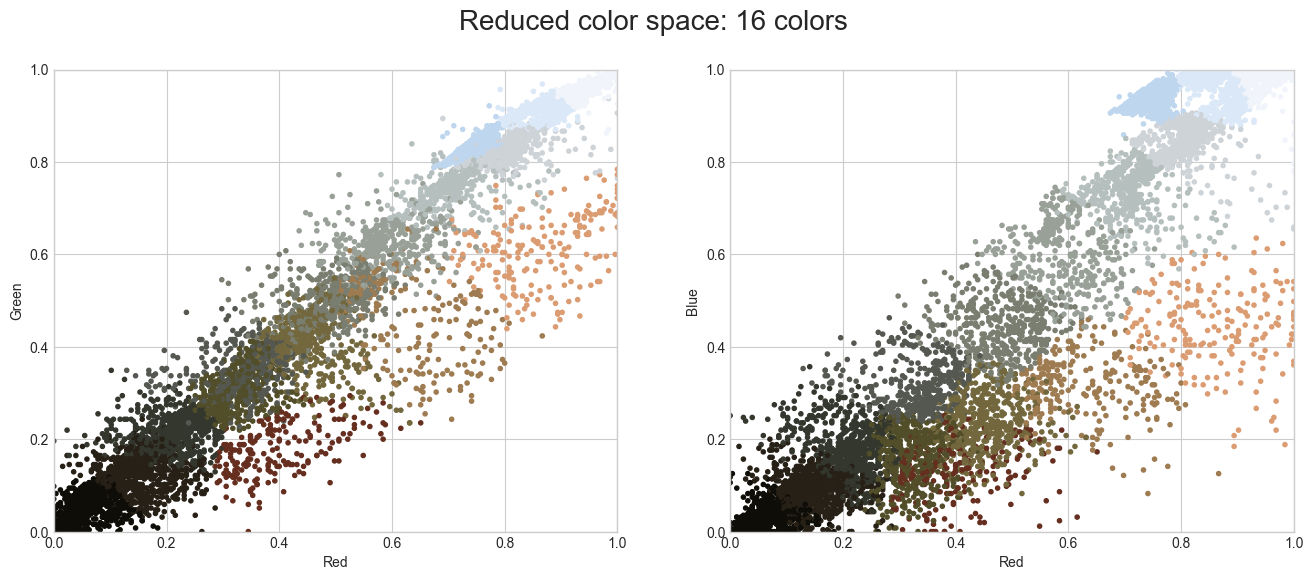

In [17]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
plot_pixels(data, colors=new_colors, title="Reduced color space: 16 colors")

In [18]:
kmeans.cluster_centers_.shape

(16, 3)

The result is a recoloring of the original pixels, where each pixel is assigned the color of its closest cluster center.
Plotting these new colors in the image space rather than the pixel space shows us the effect of this (see the following figure):

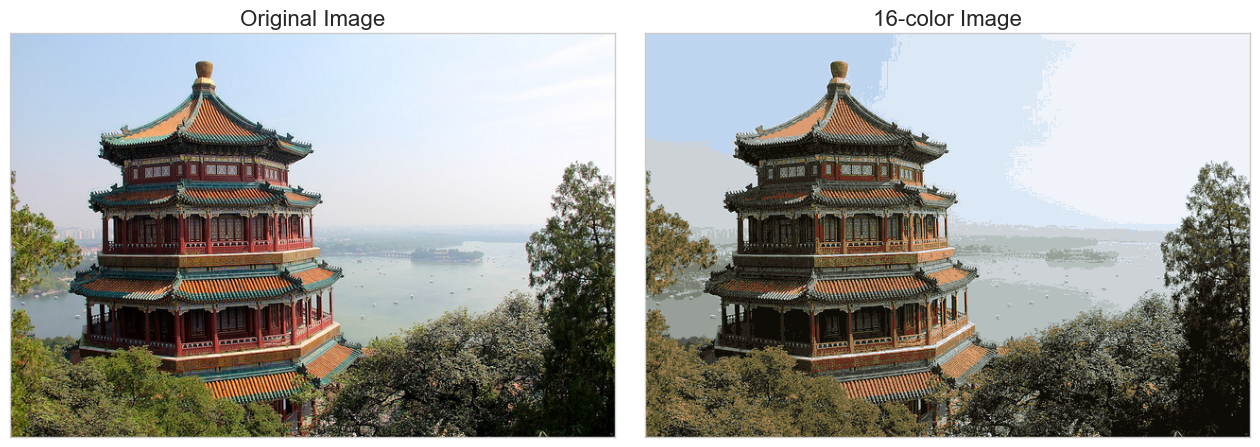

In [19]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);